Ogni file contiene 90833 dati ad un sample rate di 48000 Hz e quindi di una durata di circa 1.89 secondi


C:\Users\fulviof\AppData\Local\Temp\ipykernel_10944\3847763923.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sounds = [read(f) for f in files]


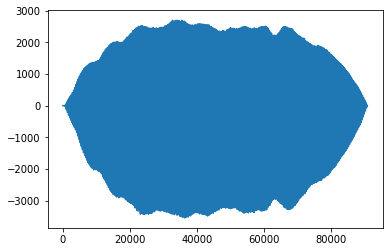

In [105]:
import numpy as np
from scipy.io.wavfile import read, write
from scipy.fft import rfft, rfftfreq
from matplotlib import pyplot as plt

files=['sounds/Sound1.wav', 'sounds/Sound2.wav', 'sounds/Sound3.wav', 'sounds/Sound4.wav', 'sounds/Sound1234.wav']
sounds = [read(f) for f in files]


signals = [sound[1][:, 1] for sound in sounds]
plt.plot(signals[1])
print("Ogni file contiene {} dati ad un sample rate di {} Hz e quindi di una durata di circa {:.2f} secondi"
        .format(
            len(signals[0]),
            sounds[0][0],
            len(signals[0])/sounds[0][0]
            )
        )

SAMPLE_RATE = sounds[0][0]  # Hertz
DURATION = len(signals[0])/sounds[0][0] # Seconds

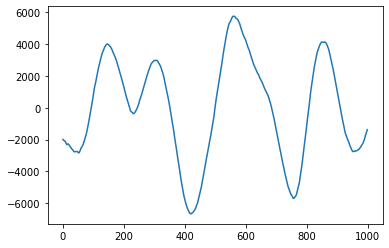

In [135]:
plt.plot(signals[4][20000:21000])

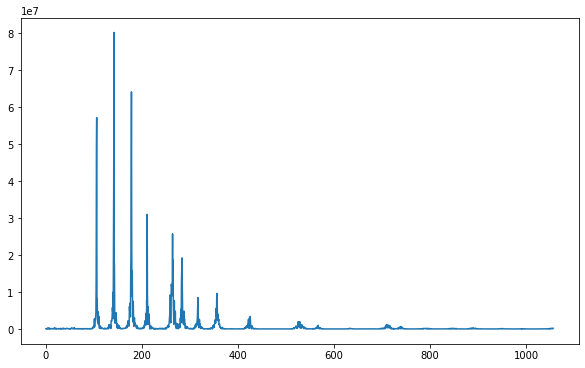

In [137]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(signals[4])
xf = rfftfreq(len(signals[4]), 1 / SAMPLE_RATE)

plt.figure(figsize=(10,6))
xmin=0
xmax=2000
plt.plot(xf[xmin:xmax], np.abs(yf)[xmin:xmax])
plt.show()


1.892375


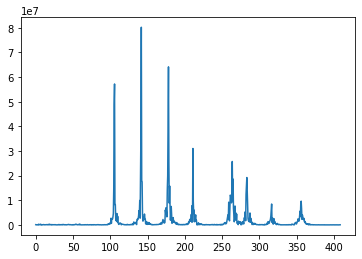

In [138]:
yf = rfft(signals[4])
xf = rfftfreq(len(signals[4]), 1 / SAMPLE_RATE)
# The maximum frequency is half the sample rate
freq_bin = len(xf) / (SAMPLE_RATE / 2)

print(freq_bin)
# Our target frequency is 4000 Hz
target_idx = int(freq_bin * 205)

xmin=0
xmax=target_idx*2

plt.plot(xf[xmin:xmax], np.abs(yf)[xmin:xmax])
plt.show()

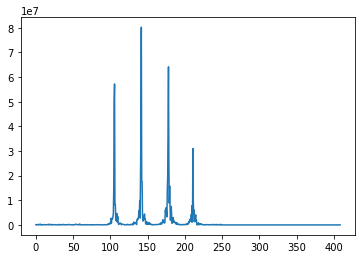

In [149]:
yf = rfft(signals[4])
xf = rfftfreq(len(signals[4]), 1 / SAMPLE_RATE)
# The maximum frequency is half the sample rate
freq_bin = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(freq_bin * 250)

yf[target_idx:len(yf)] = 0


xmin=0

plt.plot(xf[xmin:xmax], np.abs(yf)[xmin:xmax])
plt.show()


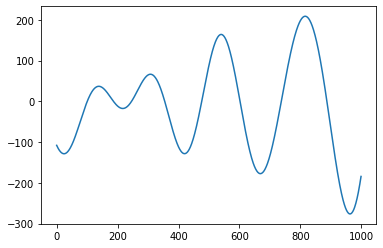

In [150]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("sounds/filtro.wav", SAMPLE_RATE, norm_new_sig)